In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

### Load The Dataset

Lets load the dataset and see the features

In [2]:
gems_df = pd.read_csv('data/train.csv')

In [4]:
gems_df.head(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
5,5,1.51,Very Good,J,SI1,62.8,58.0,7.34,7.29,4.59,7506
6,6,0.74,Ideal,E,VS2,61.8,57.0,5.76,5.79,3.57,3229
7,7,1.34,Premium,G,SI2,62.5,57.0,7.00,7.05,4.38,6224
8,8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886
9,9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421


In [5]:
gems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


There seems to be no null values, which is great

### Some Basic EDA

Let's do some basic EDA of the features

#### Cut

In [7]:
gems_df['cut'].value_counts()

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

We can stratify the data into train and test sets using this cut parameter

<Axes: xlabel='cut', ylabel='price'>

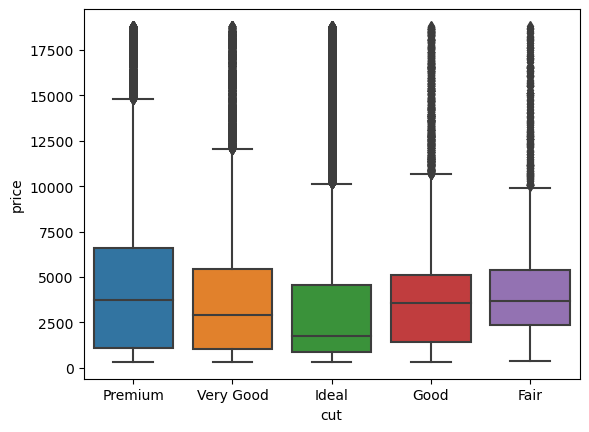

In [9]:
sns.boxplot(gems_df, x='cut', y='price')

Lets find the mean price in each of the cuts

In [94]:
mean_prices_cut = []
median_prices_cut = []
mean_prices_cut_dict = {}

for group_name, group_df in gems_df.groupby('cut'):
    print('Mean price in {}: {}'.format(group_name, str(round(group_df['price'].mean()))))
    mean_prices_cut.append(group_df['price'].mean())
    
    mean_prices_cut_dict[group_name] = group_df['price'].mean()
    
    print('Median price in {}: {}'.format(group_name, str(round(group_df['price'].median()))))
    median_prices_cut.append(group_df['price'].median())
    
print(sorted(mean_prices_cut_dict.items(), key=lambda cut_obj: cut_obj[1]))

Mean price in Fair: 4811
Median price in Fair: 3669
Mean price in Good: 4191
Median price in Good: 3592
Mean price in Ideal: 3396
Median price in Ideal: 1752
Mean price in Premium: 4797
Median price in Premium: 3742
Mean price in Very Good: 4165
Median price in Very Good: 2903
[('Ideal', 3396.1869686546825), ('Very Good', 4165.304344353937), ('Good', 4191.474100843228), ('Premium', 4797.056481667), ('Fair', 4810.503216229589)]


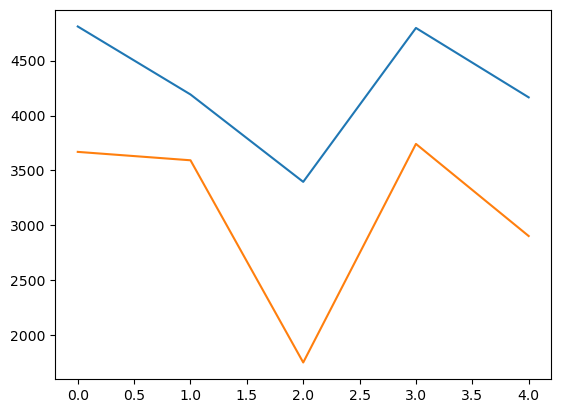

In [27]:
plt.plot(mean_prices_cut)
plt.plot(median_prices_cut)

In [86]:
ordinal_encoder_cut = OrdinalEncoder(categories=[['Ideal', 'Very Good', 'Good', 'Premium', 'Fair']])

In [87]:
cut_ordinal_encoded = ordinal_encoder_cut.fit_transform(gems_df[['cut']])

In [88]:
gems_df['cut_ordinal_encoded'] = cut_ordinal_encoded.reshape(1, -1)[0]

In [89]:
gems_df.head(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price,cut_ordinal_encoded
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619,3.0
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387,1.0
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772,0.0
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666,0.0
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453,3.0
5,5,1.51,Very Good,J,SI1,62.8,58.0,7.34,7.29,4.59,7506,1.0
6,6,0.74,Ideal,E,VS2,61.8,57.0,5.76,5.79,3.57,3229,0.0
7,7,1.34,Premium,G,SI2,62.5,57.0,7.00,7.05,4.38,6224,3.0
8,8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886,0.0
9,9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421,2.0


In [90]:
gems_df_corr = gems_df.select_dtypes(np.number).corr()

In [91]:
gems_df_corr['price']

id                    -0.001392
carat                  0.943396
depth                  0.001880
table                  0.174915
x                      0.901004
y                      0.901033
z                      0.893037
price                  1.000000
cut_ordinal_encoded    0.143015
Name: price, dtype: float64

There seems to be a very weak correlation between cut and price

#### Color

In [92]:
gems_df['color'].value_counts()

G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64

<Axes: xlabel='color', ylabel='price'>

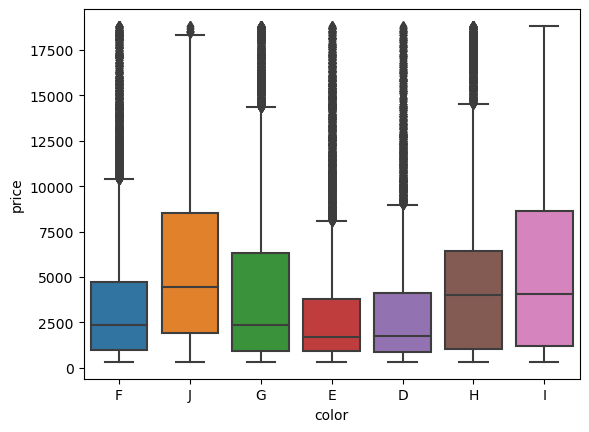

In [93]:
sns.boxplot(gems_df, x='color', y='price')

In [114]:
mean_prices_color = []
median_prices_color = []
mean_prices_color_dict = {}

for group_name, group_df in gems_df.groupby('color'):
    print('Mean price in {}: {}'.format(group_name, str(round(group_df['price'].mean()))))
    mean_prices_color.append(group_df['price'].mean())
    
    mean_prices_color_dict[group_name] = group_df['price'].mean()
    
    print('Median price in {}: {}'.format(group_name, str(round(group_df['price'].median()))))
    median_prices_color.append(group_df['price'].median())
    
print(sorted(mean_prices_color_dict.items(), key=lambda color_obj: color_obj[1]))

Mean price in D: 2976
Median price in D: 1768
Mean price in E: 2991
Median price in E: 1700
Mean price in F: 3652
Median price in F: 2347
Mean price in G: 4113
Median price in G: 2337
Mean price in H: 4777
Median price in H: 3992
Mean price in I: 5524
Median price in I: 4073
Mean price in J: 5756
Median price in J: 4434
[('D', 2976.19422712674), ('E', 2991.4542641277985), ('F', 3652.346079747796), ('G', 4113.443175418441), ('H', 4776.554530991266), ('I', 5523.764930912413), ('J', 5756.311183395291)]


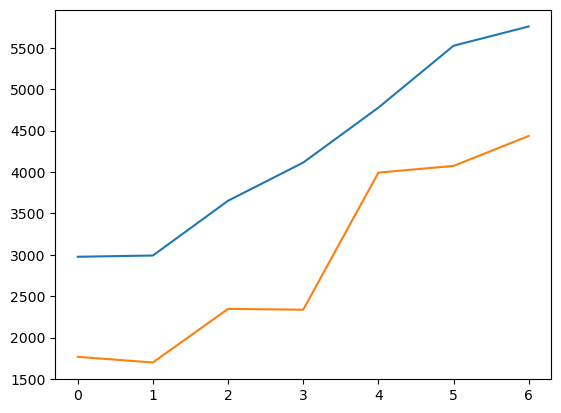

In [115]:
plt.plot(mean_prices_color)
plt.plot(median_prices_color)

In [96]:
ordinal_encoder_color = OrdinalEncoder(categories=[['D', 'E', 'F', 'G', 'H', 'I', 'J']])

In [97]:
color_ordinal_encoded = ordinal_encoder_color.fit_transform(gems_df[['color']])

In [98]:
gems_df['color_ordinal_encoded'] = color_ordinal_encoded.reshape(1, -1)[0]

In [99]:
gems_df.head(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price,cut_ordinal_encoded,color_ordinal_encoded
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619,3.0,2.0
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387,1.0,6.0
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772,0.0,3.0
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666,0.0,3.0
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453,3.0,3.0
5,5,1.51,Very Good,J,SI1,62.8,58.0,7.34,7.29,4.59,7506,1.0,6.0
6,6,0.74,Ideal,E,VS2,61.8,57.0,5.76,5.79,3.57,3229,0.0,1.0
7,7,1.34,Premium,G,SI2,62.5,57.0,7.00,7.05,4.38,6224,3.0,3.0
8,8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886,0.0,2.0
9,9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421,2.0,6.0


In [100]:
gems_df_corr = gems_df.select_dtypes(np.number).corr()

In [101]:
gems_df_corr['price']

id                      -0.001392
carat                    0.943396
depth                    0.001880
table                    0.174915
x                        0.901004
y                        0.901033
z                        0.893037
price                    1.000000
cut_ordinal_encoded      0.143015
color_ordinal_encoded    0.210859
Name: price, dtype: float64

There seems to be very weak correlation between color and price

#### Clarity

In [102]:
gems_df['clarity'].value_counts()

SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64

<Axes: xlabel='clarity', ylabel='price'>

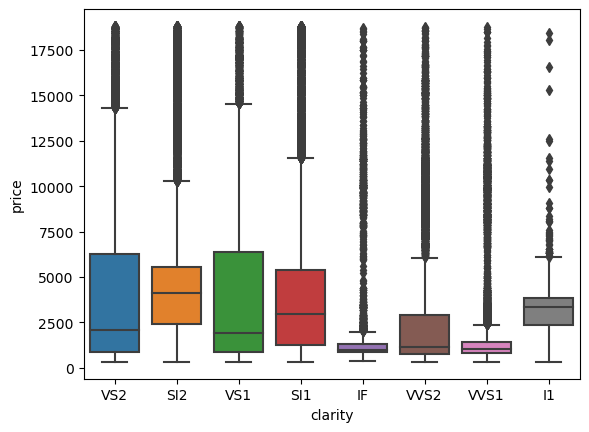

In [103]:
sns.boxplot(gems_df, x='clarity', y='price')

In [111]:
mean_prices_clarity = []
median_prices_clarity = []
mean_prices_clarity_dict = {}

for group_name, group_df in gems_df.groupby('clarity'):
    print('Mean price in {}: {}'.format(group_name, str(round(group_df['price'].mean()))))
    mean_prices_clarity.append(group_df['price'].mean())
    
    mean_prices_clarity_dict[group_name] = group_df['price'].mean()
    
    print('Median price in {}: {}'.format(group_name, str(round(group_df['price'].median()))))
    median_prices_clarity.append(group_df['price'].median())
    
print(sorted(mean_prices_clarity_dict.items(), key=lambda color_obj: color_obj[1]))

Mean price in I1: 3540
Median price in I1: 3358
Mean price in IF: 2127
Median price in IF: 979
Mean price in SI1: 4141
Median price in SI1: 2970
Mean price in SI2: 5220
Median price in SI2: 4144
Mean price in VS1: 3758
Median price in VS1: 1908
Mean price in VS2: 4048
Median price in VS2: 2079
Mean price in VVS1: 2013
Median price in VVS1: 1013
Mean price in VVS2: 2966
Median price in VVS2: 1129
[('VVS1', 2013.4400639819346), ('IF', 2126.509836454136), ('VVS2', 2966.0130694074355), ('I1', 3540.162109375), ('VS1', 3758.400534741922), ('VS2', 4047.61767339205), ('SI1', 4140.760681033188), ('SI2', 5220.441903949613)]


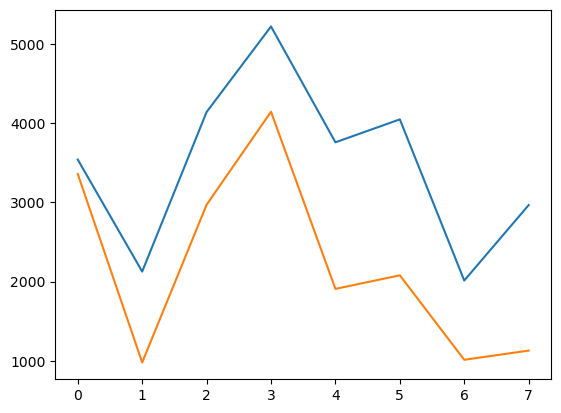

In [112]:
plt.plot(mean_prices_clarity)
plt.plot(median_prices_clarity)

In [116]:
ordinal_encoder_clarity = OrdinalEncoder(categories=[['VVS1', 'IF', 'VVS2', 'I1', 'VS1', 'VS2', 'SI1', 'SI2']])

In [117]:
clarity_ordinal_encoded = ordinal_encoder_clarity.fit_transform(gems_df[['clarity']])

In [118]:
gems_df['clarity_ordinal_encoded'] = clarity_ordinal_encoded.reshape(1, -1)[0]

gems_df.head(10)

In [120]:
gems_df_corr = gems_df.select_dtypes(np.number).corr()

In [121]:
gems_df_corr['price']

id                        -0.001392
carat                      0.943396
depth                      0.001880
table                      0.174915
x                          0.901004
y                          0.901033
z                          0.893037
price                      1.000000
cut_ordinal_encoded        0.143015
color_ordinal_encoded      0.210859
clarity_ordinal_encoded    0.188188
Name: price, dtype: float64

There seems yo be weak corelation between clarity and price

### Lets Check All Correlations

In [123]:
gems_df_corr

,id,carat,depth,table,x,y,z,price,cut_ordinal_encoded,color_ordinal_encoded,clarity_ordinal_encoded
id,1.000000,-0.000771,0.002647,0.002448,-0.000476,-0.000448,0.000037,-0.001392,0.003685,-0.001267,0.003199
carat,-0.000771,1.000000,0.027852,0.225737,0.980563,0.980161,0.974274,0.943396,0.194098,0.292400,0.338794
depth,0.002647,0.027852,1.000000,-0.230631,-0.010762,-0.011653,0.081821,0.001880,-0.025388,0.035517,0.054712
table,0.002448,0.225737,-0.230631,1.000000,0.237578,0.233299,0.212208,0.174915,0.602154,0.034978,0.175033
x,-0.000476,0.980563,-0.010762,0.237578,1.000000,0.999109,0.989724,0.901004,0.199447,0.269394,0.366983
y,-0.000448,0.980161,-0.011653,0.233299,0.999109,1.000000,0.989527,0.901033,0.189292,0.269509,0.365481
z,0.000037,0.974274,0.081821,0.212208,0.989724,0.989527,1.000000,0.893037,0.190278,0.270132,0.367579
price,-0.001392,0.943396,0.001880,0.174915,0.901004,0.901033,0.893037,1.000000,0.143015,0.210859,0.188188
cut_ordinal_encoded,0.003685,0.194098,-0.025388,0.602154,0.199447,0.189292,0.190278,0.143015,1.000000,0.041724,0.182546
color_ordinal_encoded,-0.001267,0.292400,0.035517,0.034978,0.269394,0.269509,0.270132,0.210859,0.041724,1.000000,-0.080217


There seems to be some corellation between table and cut. Lets combine them

In [127]:
gems_df['table_by_cut'] = gems_df['table'] * gems_df['cut_ordinal_encoded']

In [128]:
gems_df_corr = gems_df.select_dtypes(np.number).corr()

In [129]:
gems_df_corr['price']

id                        -0.001392
carat                      0.943396
depth                      0.001880
table                      0.174915
x                          0.901004
y                          0.901033
z                          0.893037
price                      1.000000
cut_ordinal_encoded        0.143015
color_ordinal_encoded      0.210859
clarity_ordinal_encoded    0.188188
table_by_cut               0.144376
Name: price, dtype: float64